# 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv', sep = ',')  # https://www.tfcertification.com/pages/machine-learning-practical

In [4]:
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

# 데이터 시각화

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_df, dtype = 'float32')

In [15]:
testing = np.array(fashion_test_df, dtype = 'float32')

4.0

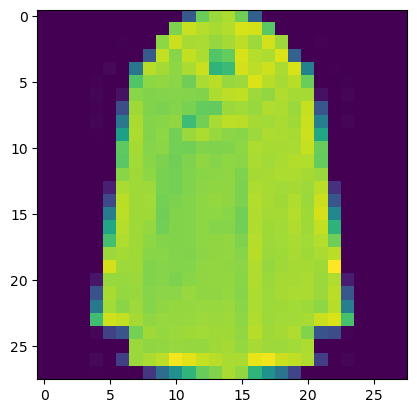

In [11]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]     # Target check
label

In [11]:
# The 10 classes are as follows:  
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

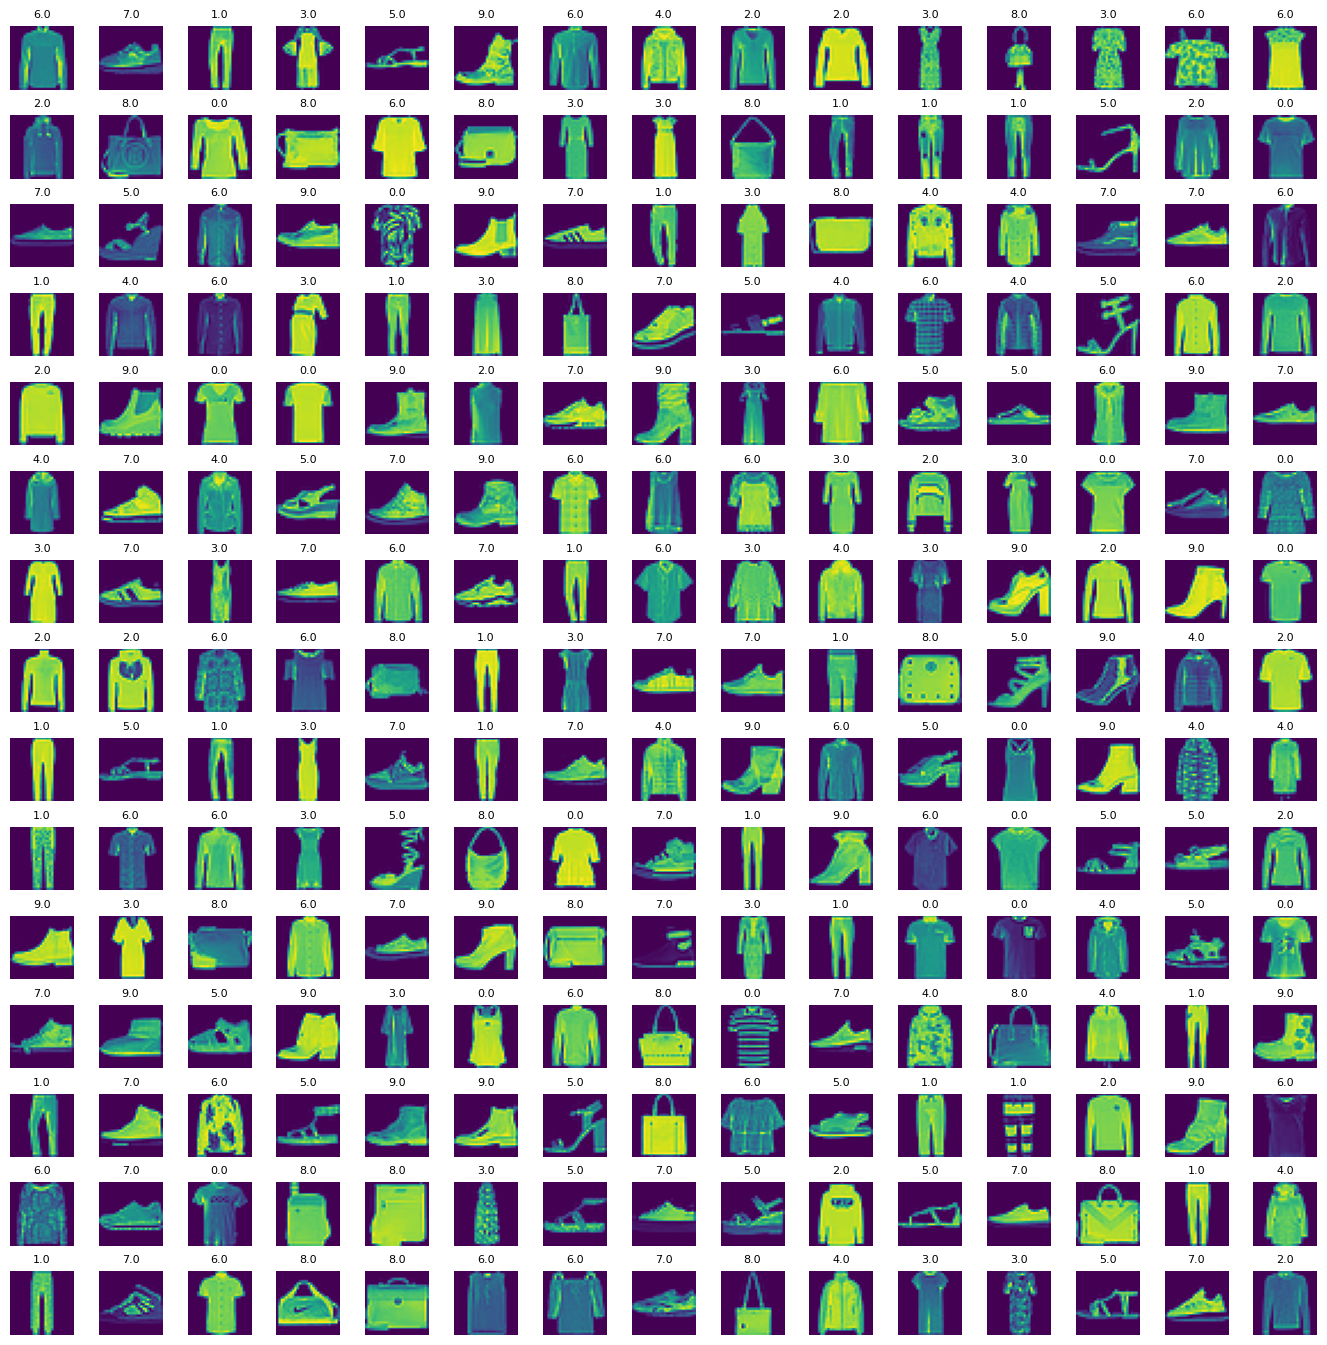

In [12]:
# Grid Format 으로 더 많은 이미지를 한번에 확인
# Plot grid 의 Dimension 정의 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# 이는 Figure 오브젝트와 axes 오브젝트를 반환함
# figure 들을 시각화 할때 axes 오브젝트를 사용 가능

fig, axes = plt.subplots(L_grid, W_grid, figsize =(17, 17))

axes = axes.ravel()  # 15 X 15 matrix 를 225 짜리 배열로 평탄화 함

n_training = len(training) # 학습 데이터 셋의 길이를 가져옴

# 0 부터 n_training 사이의 랜덤한 수를 선택

for i in np.arange(0, W_grid * L_grid): 
    
    # 무작위의 수를 선정
    index = np.random.randint(0, n_training)
    # index 에 해당하는 이미지를 읽고 시각화 함
    axes[i].imshow(training[index, 1:].reshape((28,28)) )
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# 모델 트레이닝

In [13]:
X_train = training[:, 1:] / 255
y_train = training[:, 0]

In [16]:
X_test = testing[:, 1:] / 255
y_test = testing[:, 0]

In [17]:
# 검증 데이터 셋을 이용하여 과적합 방지하는 과정임

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [72]:
# 모든 데이터를 이미지 형태로 만든다.
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))   # '*' Opearator Unpacks Tuple, (X_train.shape[0], 28, 28, 1) 과 같음
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [24]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [30]:
import keras

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [33]:
cnn_model = Sequential()

In [34]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation='relu')) # 32개의 3 X 3 Feature detector 사용

In [35]:
# Max Pooling Layer 지정
cnn_model.add(MaxPooling2D(pool_size = (2,2))) # 2 X 2 size Max Pooling Function

In [36]:
# Flattening
cnn_model.add(Flatten())

In [54]:
cnn_model.add(Dense(32, activation = 'relu')) # 은닉레이어이고, 마지막에는 10개의 클래스로 분류한다

In [55]:
cnn_model.add(Dense(10, activation = 'sigmoid')) # 10 개 클래스중 하나를 정해야하기에 Sigmoid Function을 사용

In [62]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])

In [63]:
epochs = 50

In [73]:
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512,
              epochs = epochs,
              verbose =1,
              validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 1s 12ms/step - loss: 0.2931 - accuracy: 0.8924 - val_loss: 0.3563 - val_accuracy: 0.8723
Epoch 2/50
94/94 [==============================] - 1s 11ms/step - loss: 0.2912 - accuracy: 0.8941 - val_loss: 0.3534 - val_accuracy: 0.8736
Epoch 3/50
94/94 [==============================] - 1s 11ms/step - loss: 0.2904 - accuracy: 0.8935 - val_loss: 0.3576 - val_accuracy: 0.8717
Epoch 4/50
94/94 [==============================] - 1s 11ms/step - loss: 0.2901 - accuracy: 0.8935 - val_loss: 0.3531 - val_accuracy: 0.8727
Epoch 5/50
94/94 [==============================] - 1s 11ms/step - loss: 0.2899 - accuracy: 0.8942 - val_loss: 0.3588 - val_accuracy: 0.8704
Epoch 6/50
94/94 [==============================] - 1s 11ms/step - loss: 0.2886 - accuracy: 0.8951 - val_loss: 0.3511 - val_accuracy: 0.8724
Epoch 7/50
94/94 [==============================] - 1s 11ms/step - loss: 0.2889 - accuracy: 0.8950 - val_loss: 0.3512 - val_accuracy: 0.8744
Epoch 8/50
94

# 모델 평가

In [66]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8794
Test Accuracy : 0.879


In [74]:
raw_output = cnn_model.predict(X_test)
predicted_classes = np.argmax(raw_output, axis=1)

313/313 [==============================] - 0s 1ms/step


In [75]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

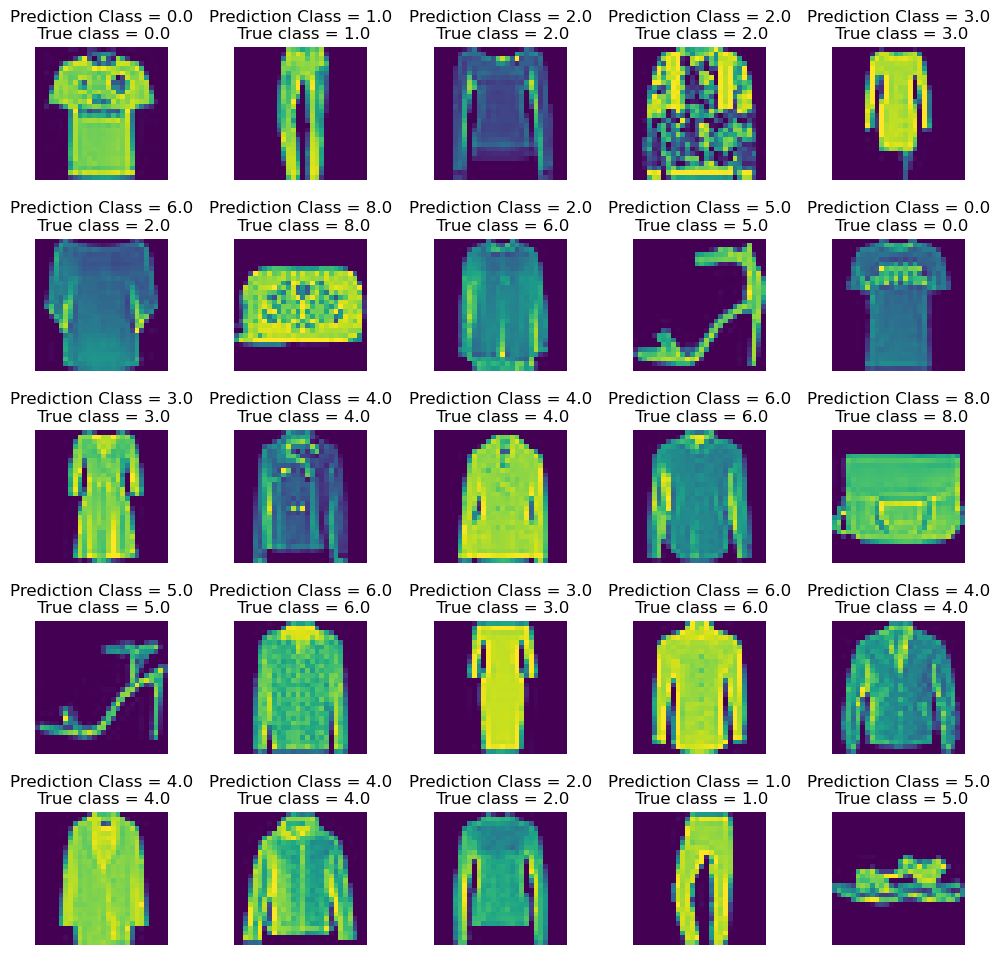

In [77]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize= (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off') # 픽셀 또는 차원의 수는 안봐도 됨 (너무 많은 그림)
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

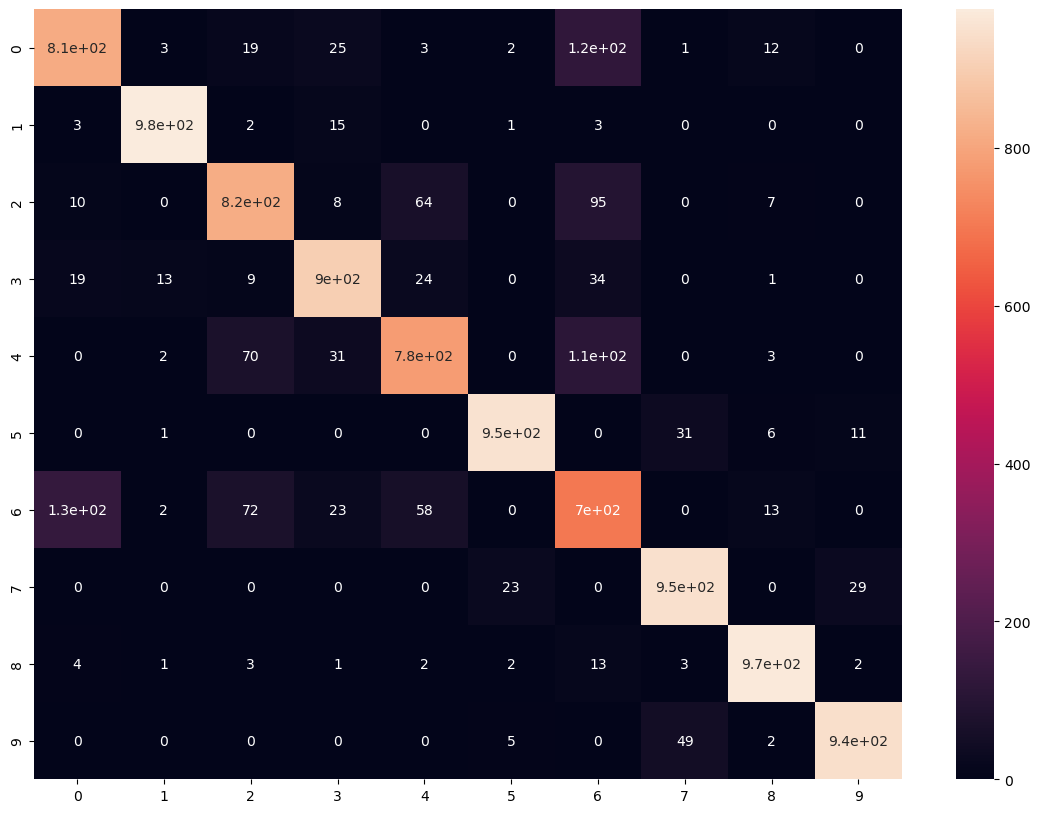

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [ ]:
# The 10 classes are as follows:  
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [80]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.81      0.82      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.82      0.82      0.82      1000
     Class 3       0.90      0.90      0.90      1000
     Class 4       0.84      0.78      0.81      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.65      0.70      0.67      1000
     Class 7       0.92      0.95      0.93      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

